In [1]:
import pickle
import pandas as pd
import clustering_algorithms
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
with open('final.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df=df[df.star!='100']
df=df[df.star!='80']

In [4]:
df.shape

(826, 12)

# Dimensionality Checking

## D= 10

In [26]:
(cv,tfidf)= clustering_algorithms.making_vectorizers(df.review, 10)

In [27]:
cv.fit(df['review'])

In [28]:
cv.kmeans(10)

### TSNE and Histogram

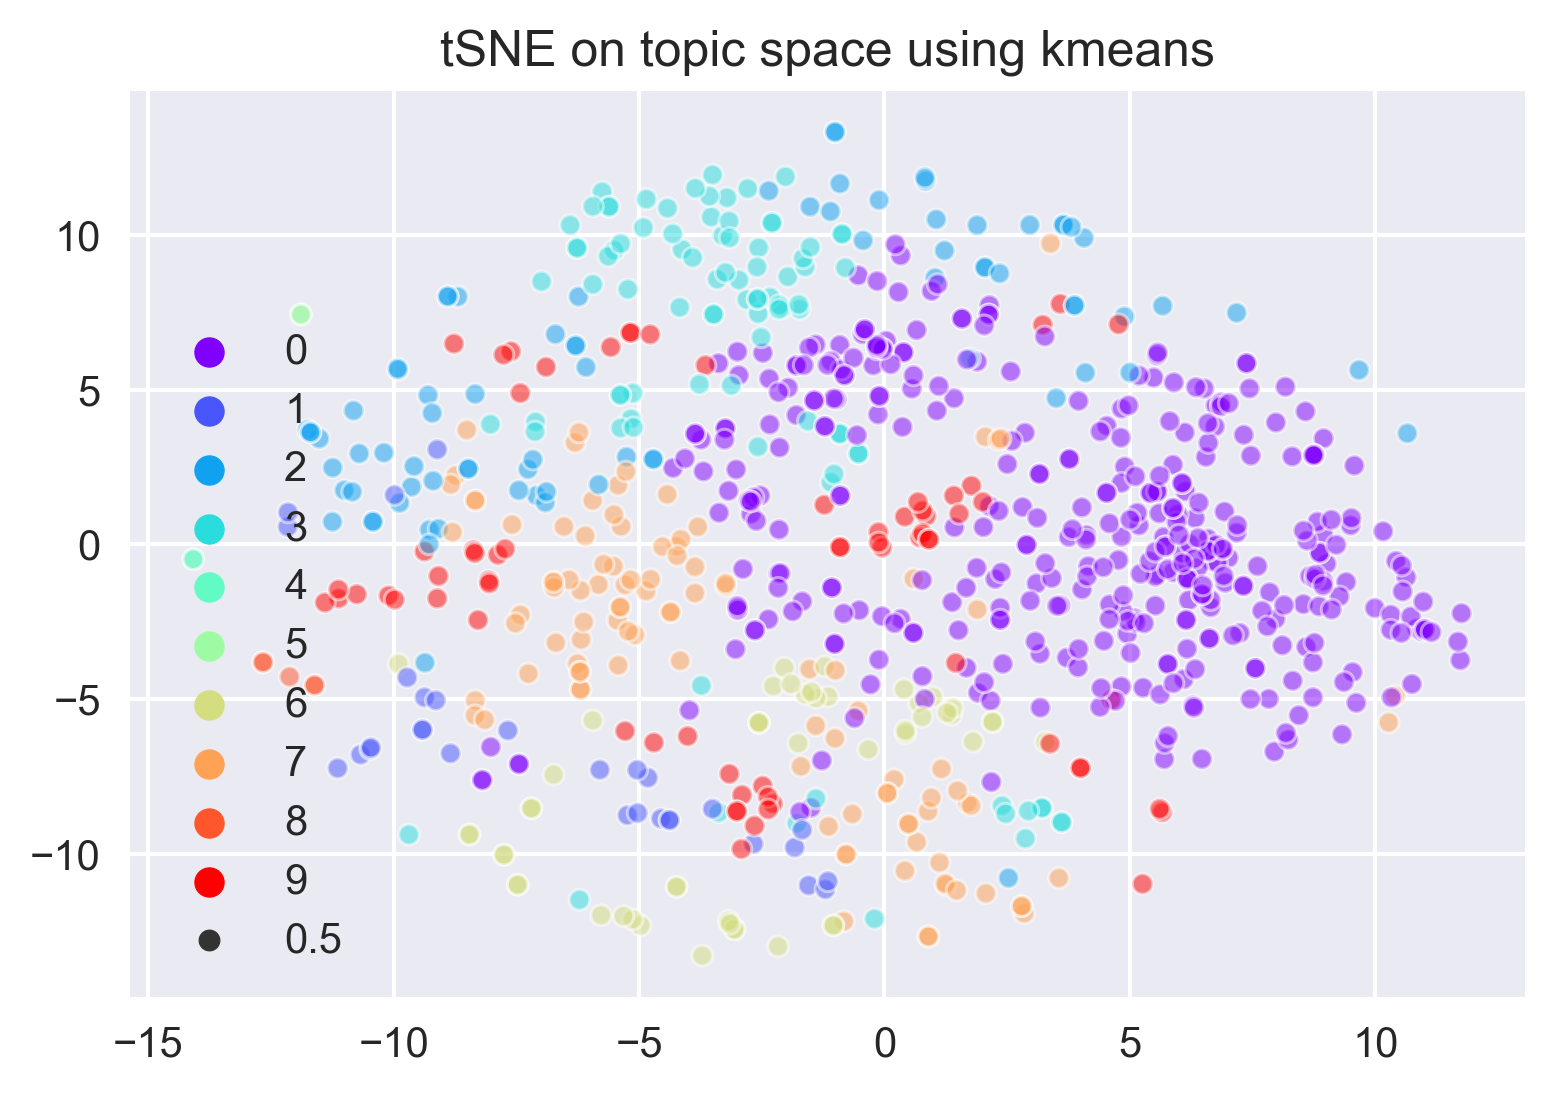

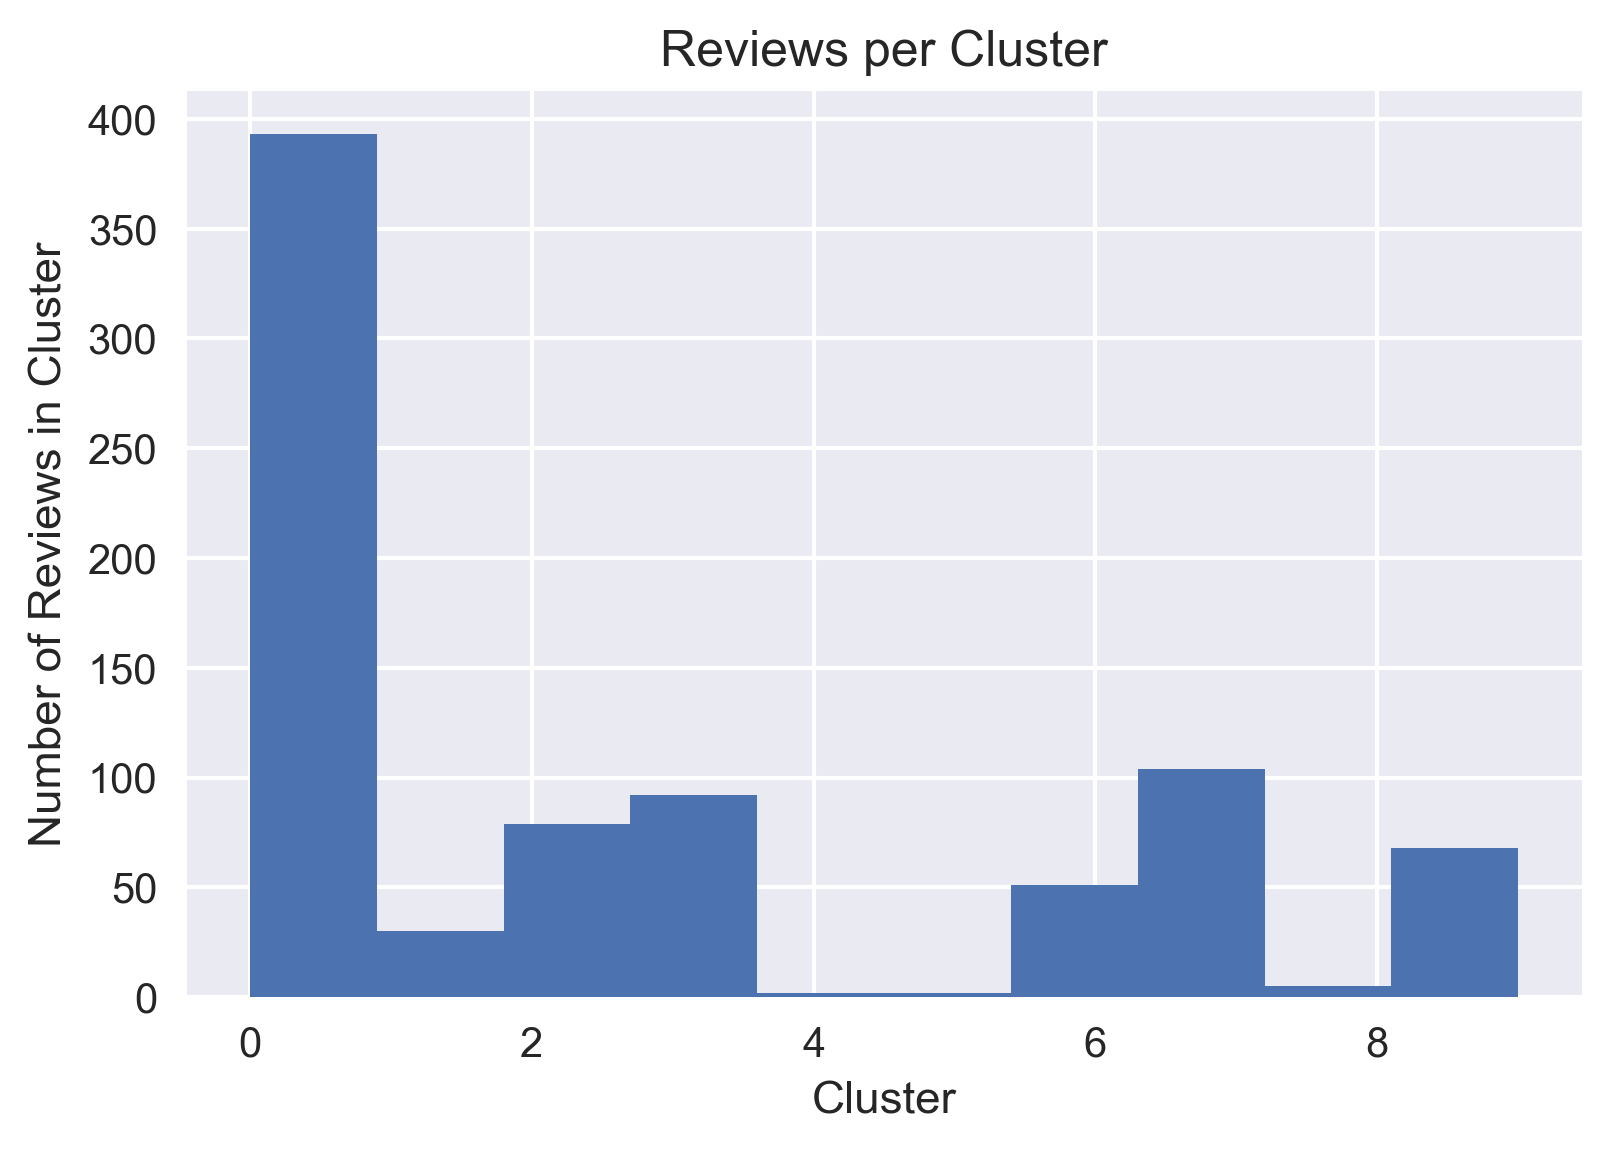

In [29]:
cv.tsne(2, 100)

## D=25

In [5]:
(one, two)= clustering_algorithms.making_vectorizers(df.review, 25)

In [6]:
one.fit(df['review'])

In [7]:
one.kmeans(10)

### TSNE and Histogram

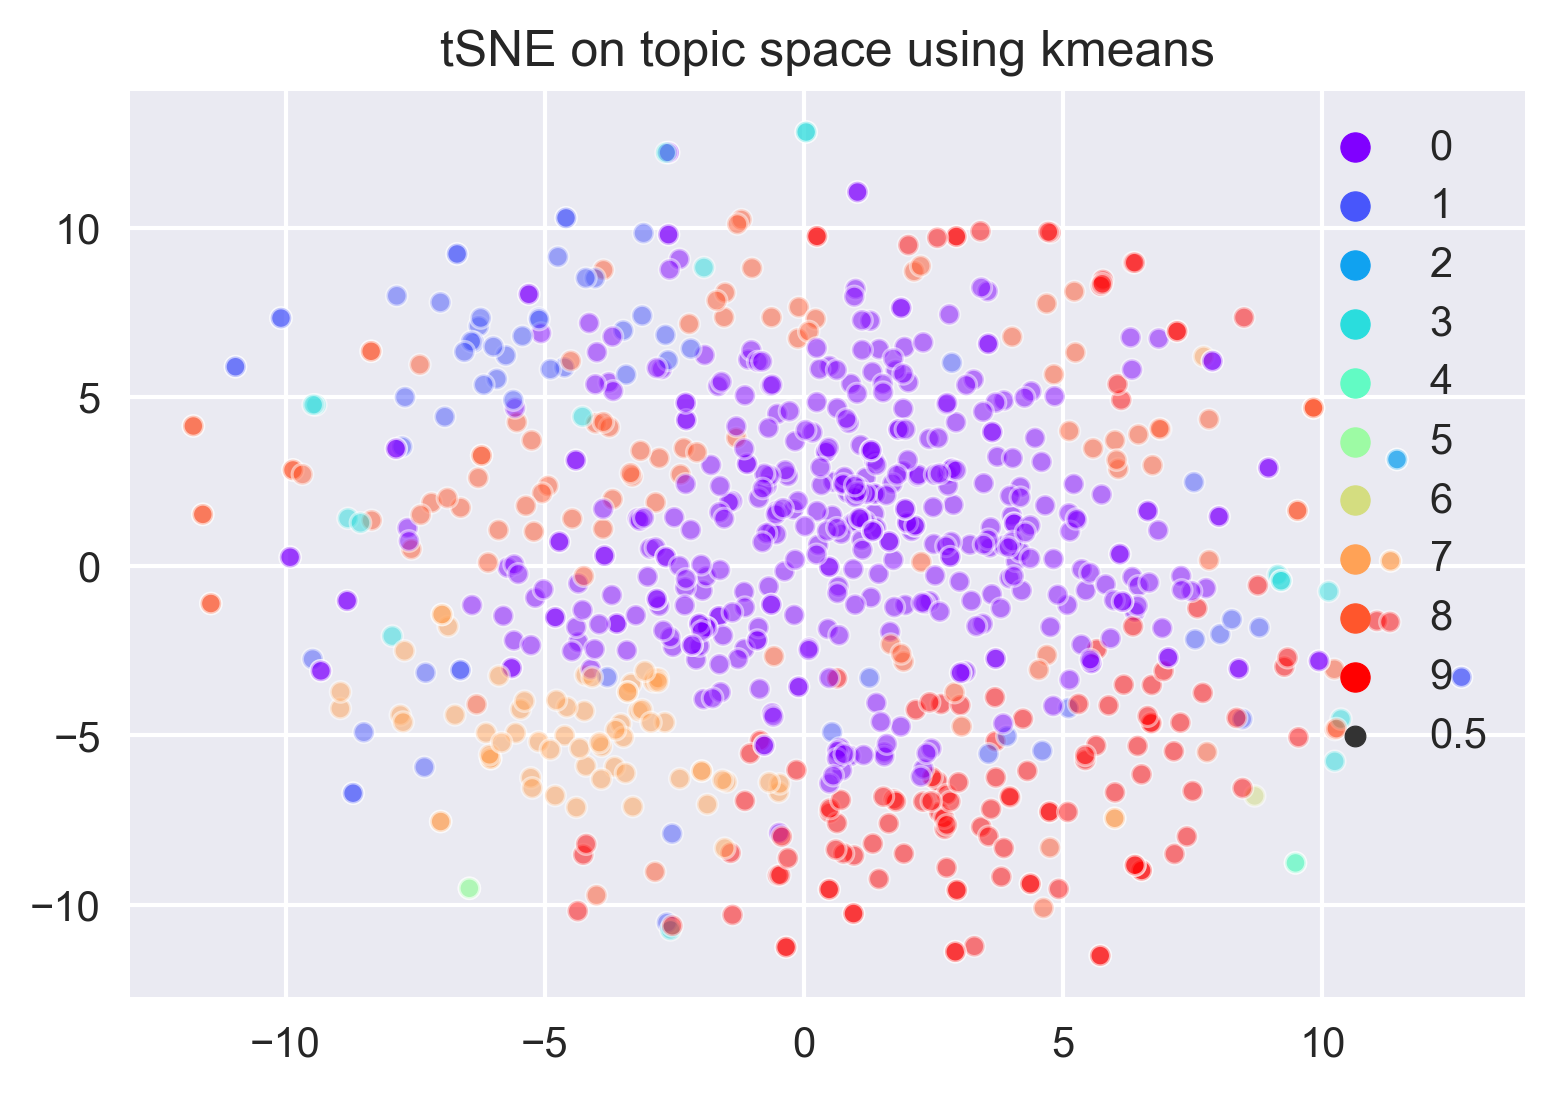

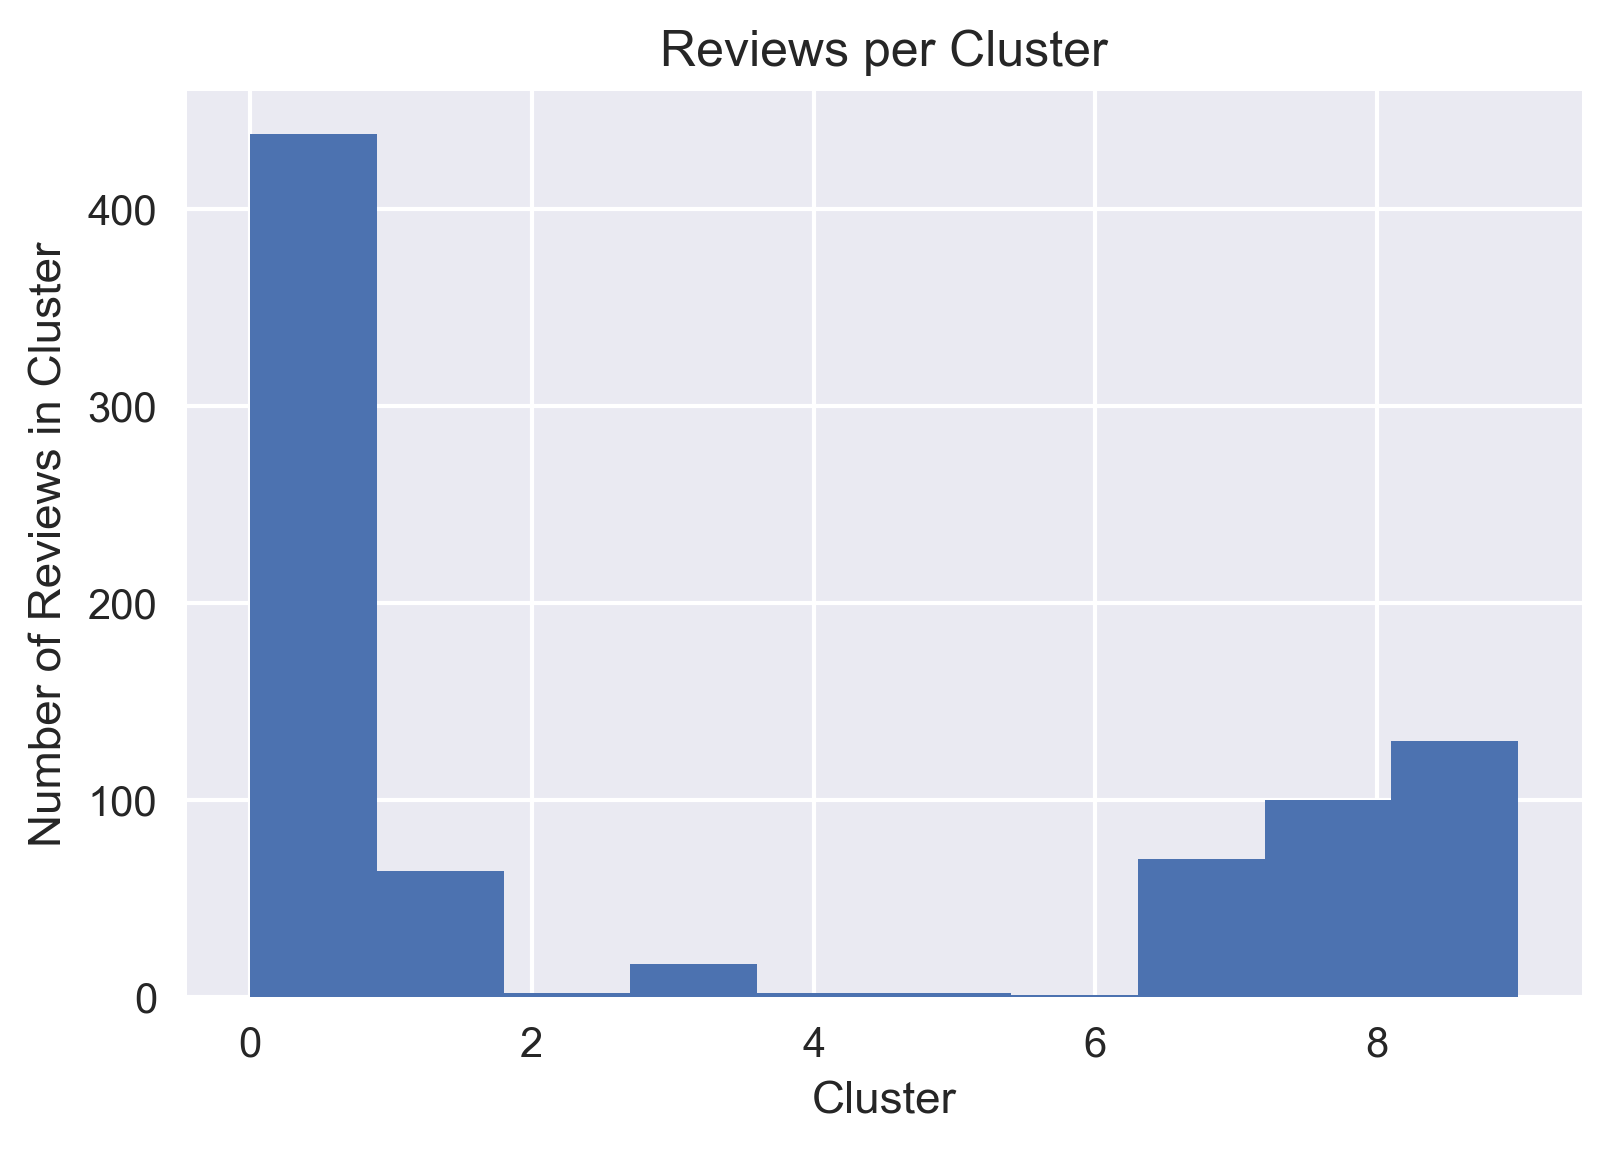

In [8]:
one.tsne(2, 100)

## 50

In [9]:
(three, four)= clustering_algorithms.making_vectorizers(df.review, 50)

In [10]:
three.fit(df['review'])

In [11]:
three.kmeans(10)

### TSNE and Histogram

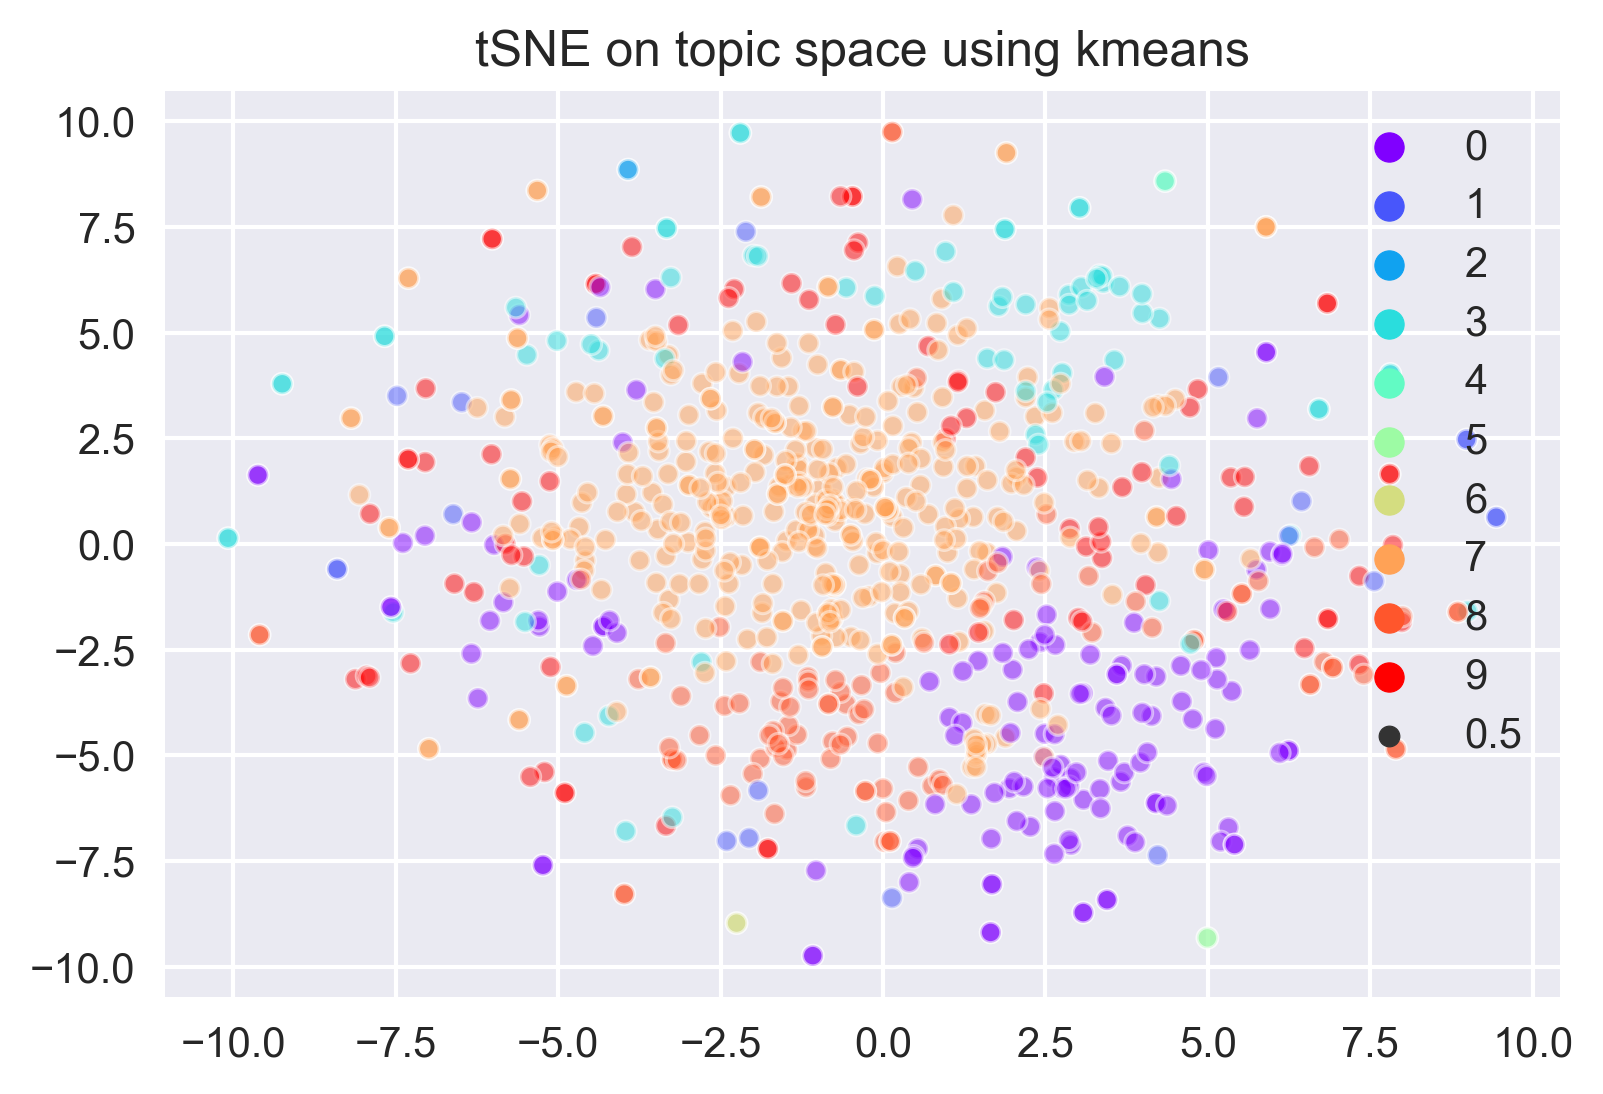

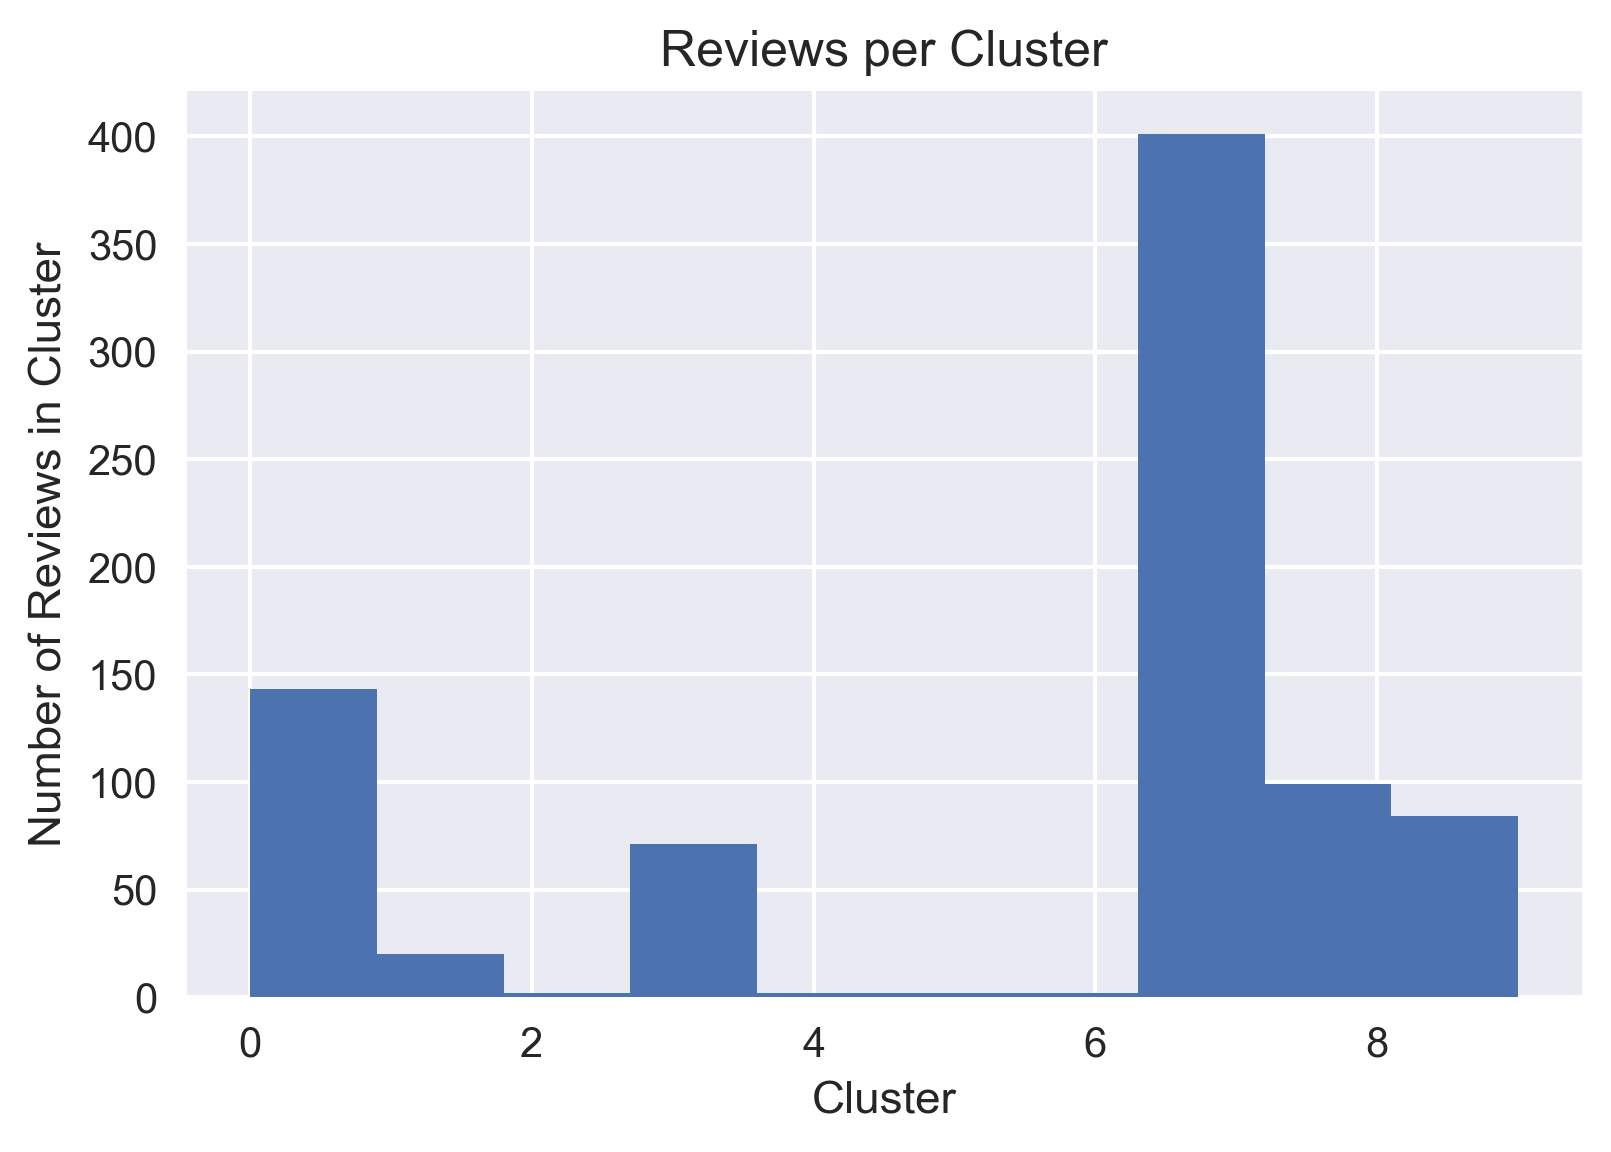

In [12]:
three.tsne(2, 100)

## 75

In [13]:
(five, six)= clustering_algorithms.making_vectorizers(df.review, 75)

In [14]:
five.fit(df['review'])

In [15]:
five.kmeans(10)

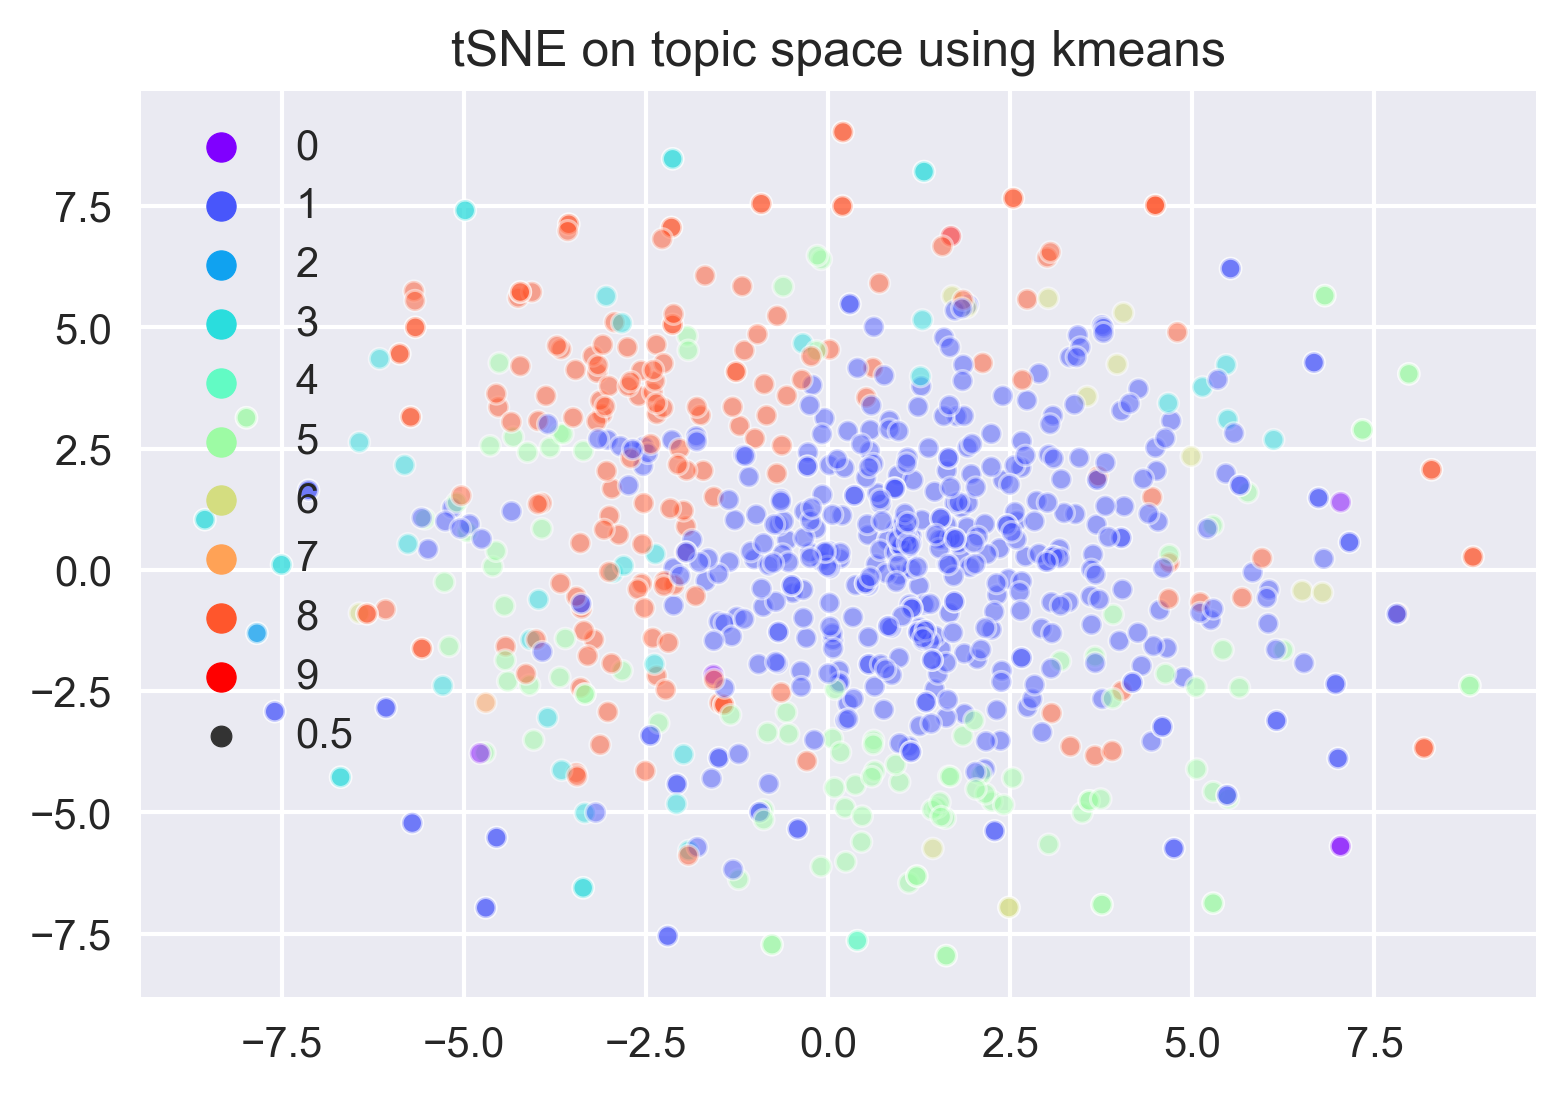

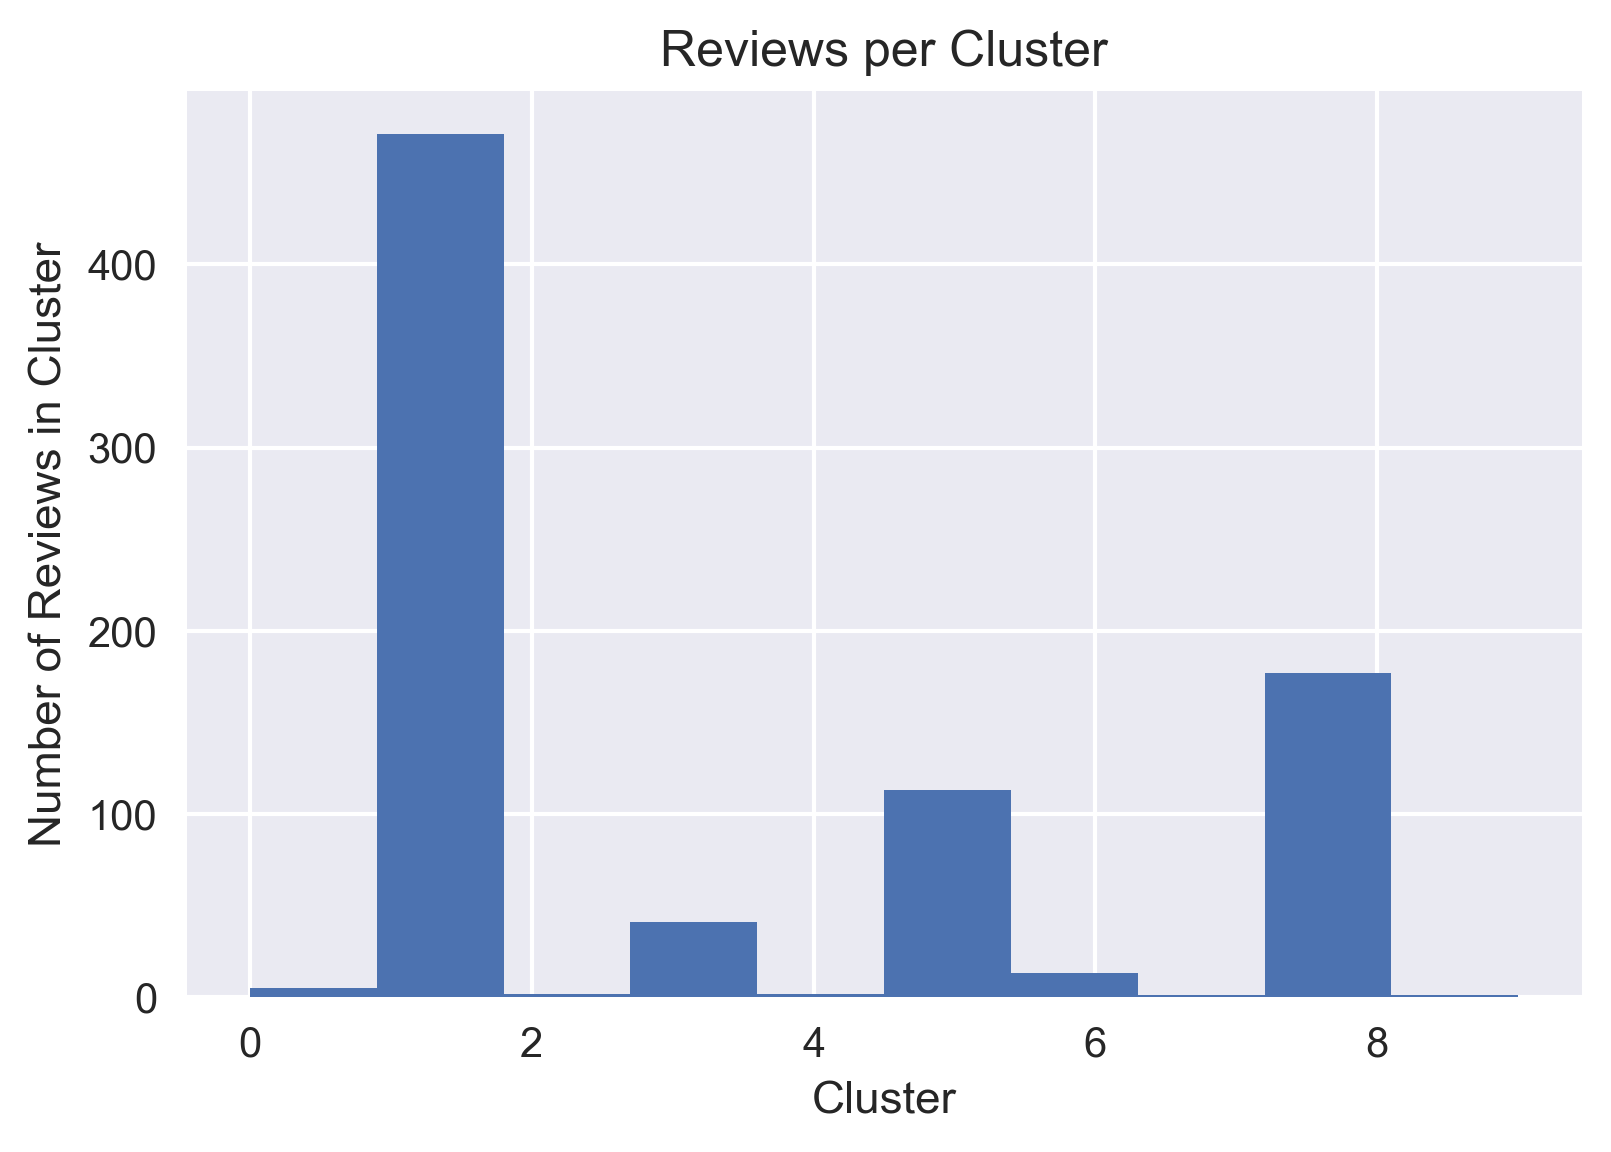

In [16]:
five.tsne(2, 100)

## 100

In [17]:
(seven, eight)= clustering_algorithms.making_vectorizers(df.review, 100)

In [18]:
seven.fit(df['review'])

In [19]:
seven.kmeans(10)

### TSNE and Histogram

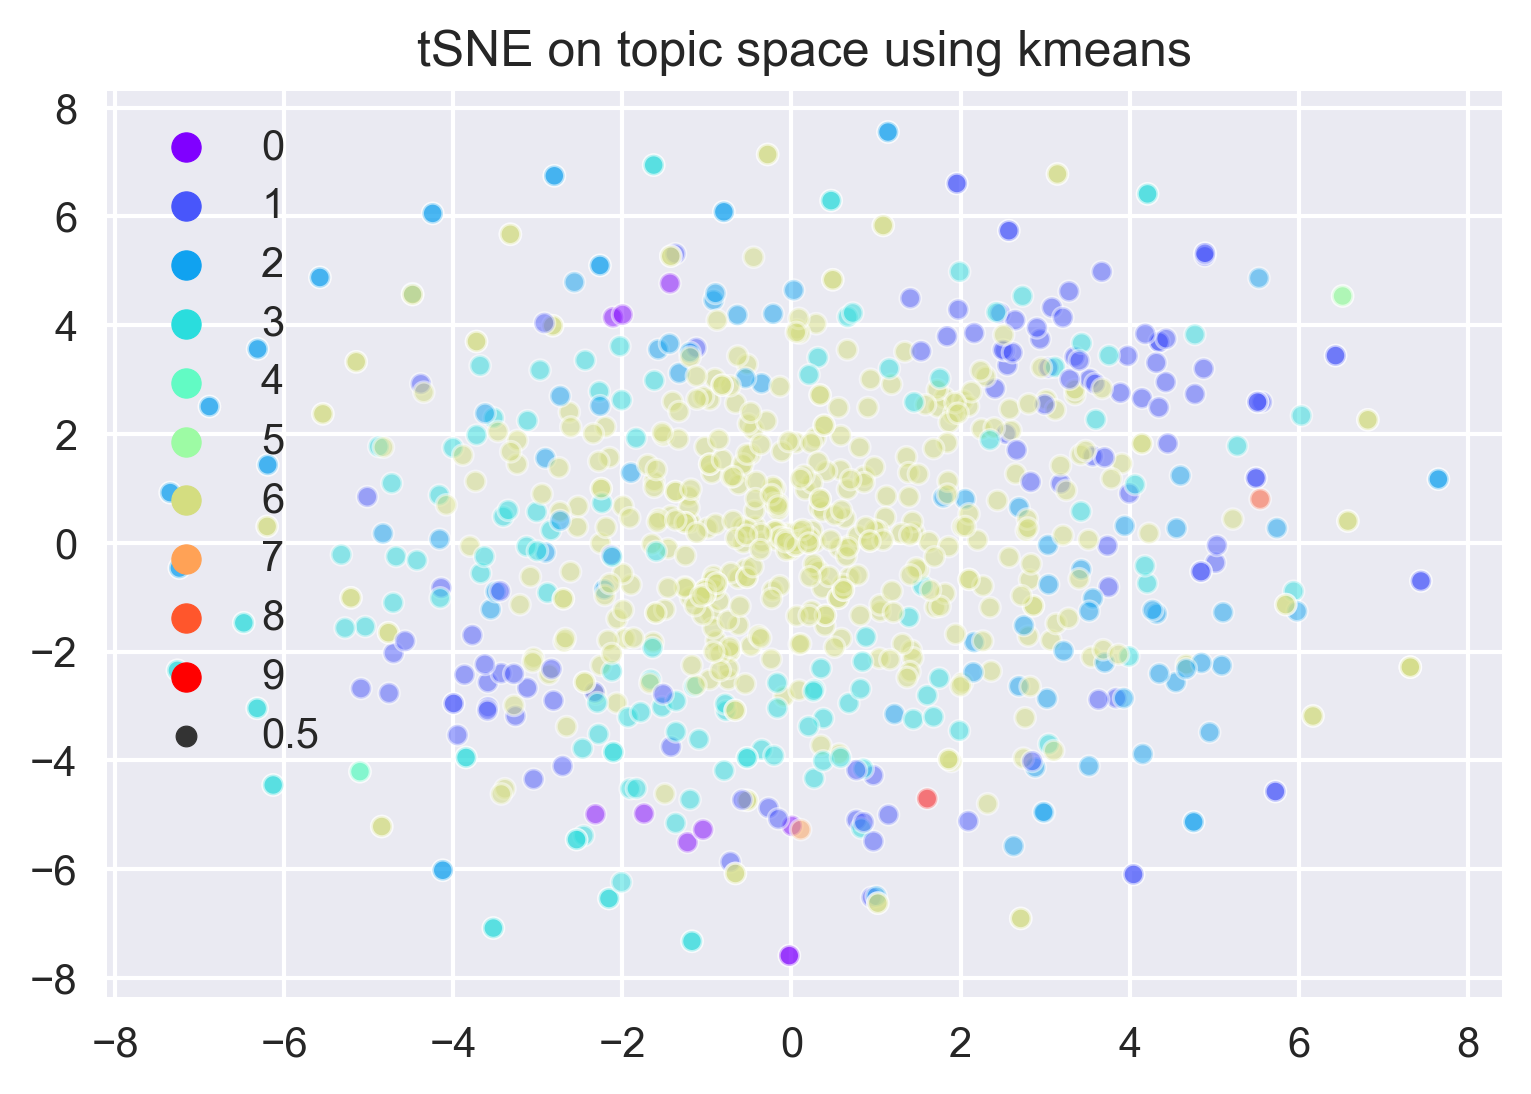

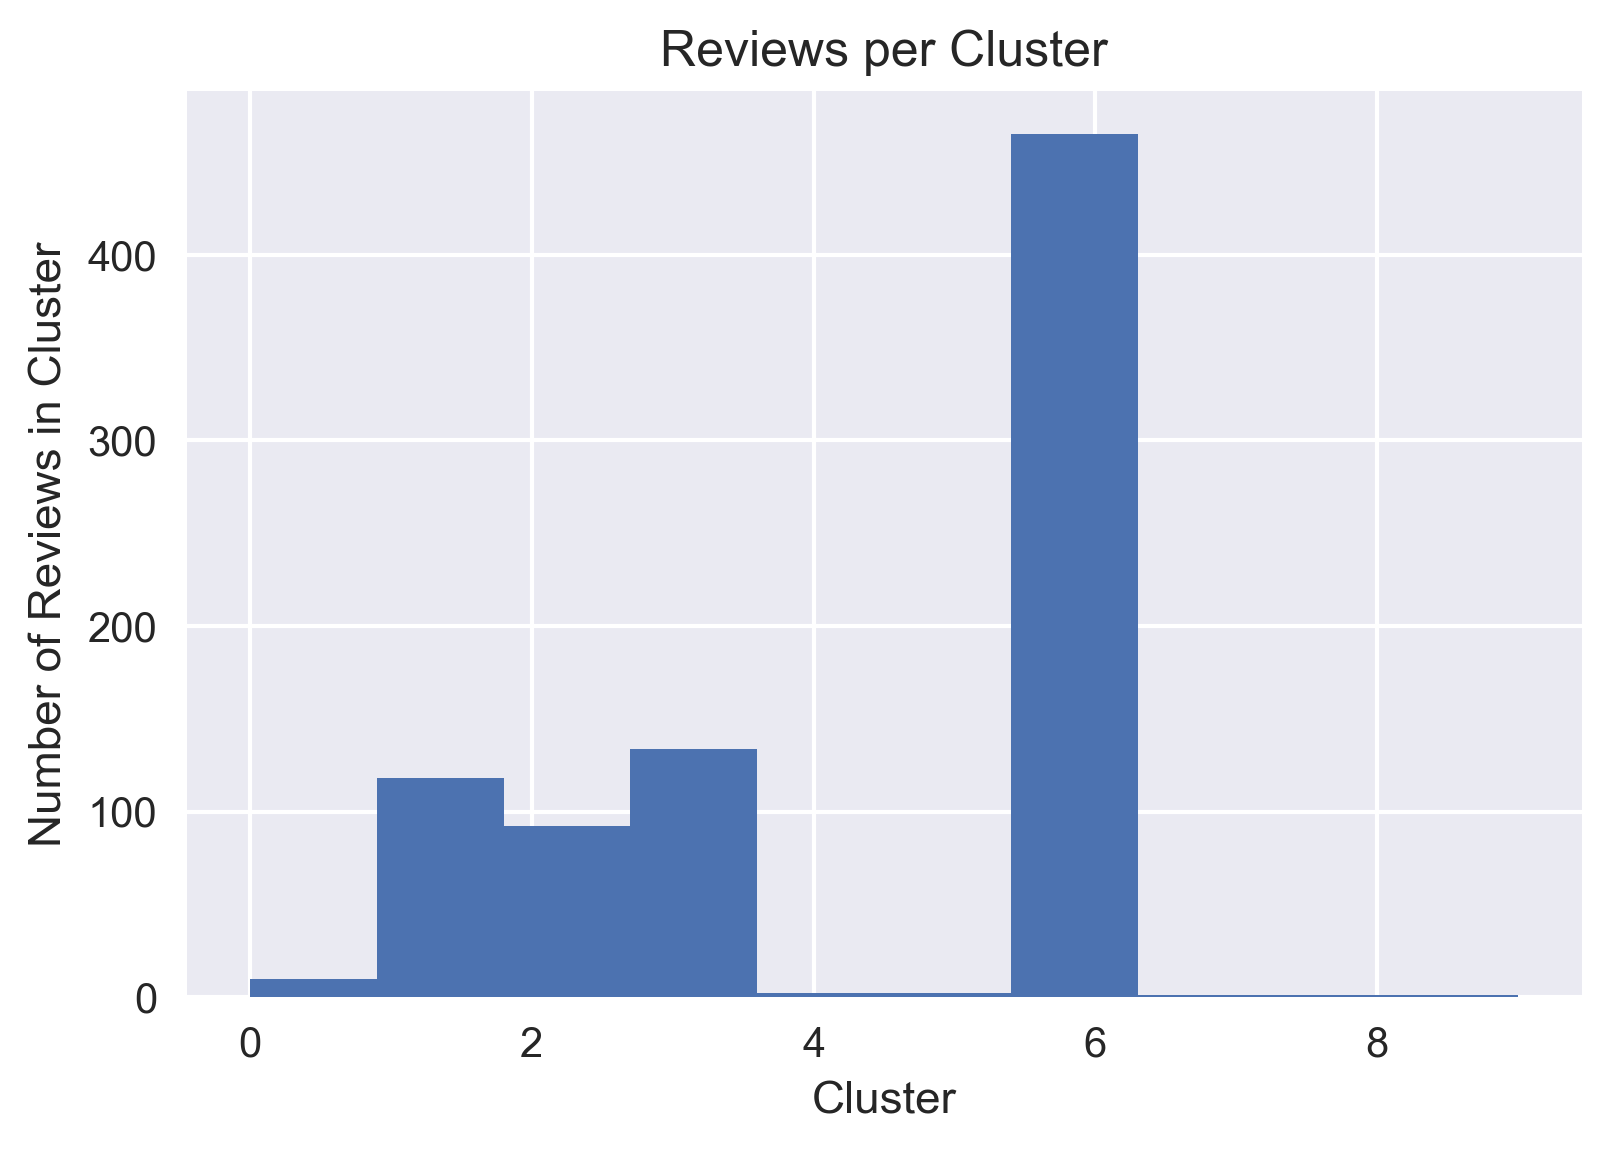

In [20]:
seven.tsne(2, 100)

## Result: Best Dimensionality= 50

# Number of Clusters

In [30]:
from sklearn.cluster import KMeans

## Calculate Inertia, SSE, Silhouette Coef

In [31]:
SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(cv.topic_data)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(cv.topic_data, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 


inertia = [0,0]

for n_clusters in range(2, 25):
    km = KMeans(n_clusters = n_clusters)
    km.fit(cv.topic_data)
    msg = f"""# clusters: {n_clusters:2d}   Inertia: {km.inertia_:8.6f}"""
    inertia.append(km.inertia_)
    print(msg)

# clusters:  2   Inertia: 6839.972035
# clusters:  3   Inertia: 6066.414967
# clusters:  4   Inertia: 5625.694490
# clusters:  5   Inertia: 5036.883940
# clusters:  6   Inertia: 4694.622745
# clusters:  7   Inertia: 4397.083027
# clusters:  8   Inertia: 4120.735239
# clusters:  9   Inertia: 3916.283865
# clusters: 10   Inertia: 3726.842445
# clusters: 11   Inertia: 3565.185479
# clusters: 12   Inertia: 3427.757243
# clusters: 13   Inertia: 3297.698608
# clusters: 14   Inertia: 3168.978128
# clusters: 15   Inertia: 3035.910266
# clusters: 16   Inertia: 2958.275766
# clusters: 17   Inertia: 2843.630002
# clusters: 18   Inertia: 2778.667692
# clusters: 19   Inertia: 2714.490434
# clusters: 20   Inertia: 2643.302182
# clusters: 21   Inertia: 2568.413985
# clusters: 22   Inertia: 2506.755216
# clusters: 23   Inertia: 2436.282864
# clusters: 24   Inertia: 2422.793987


## Plot SSE and Coefficient

Text(0.5,1,'SSE By Cluster')

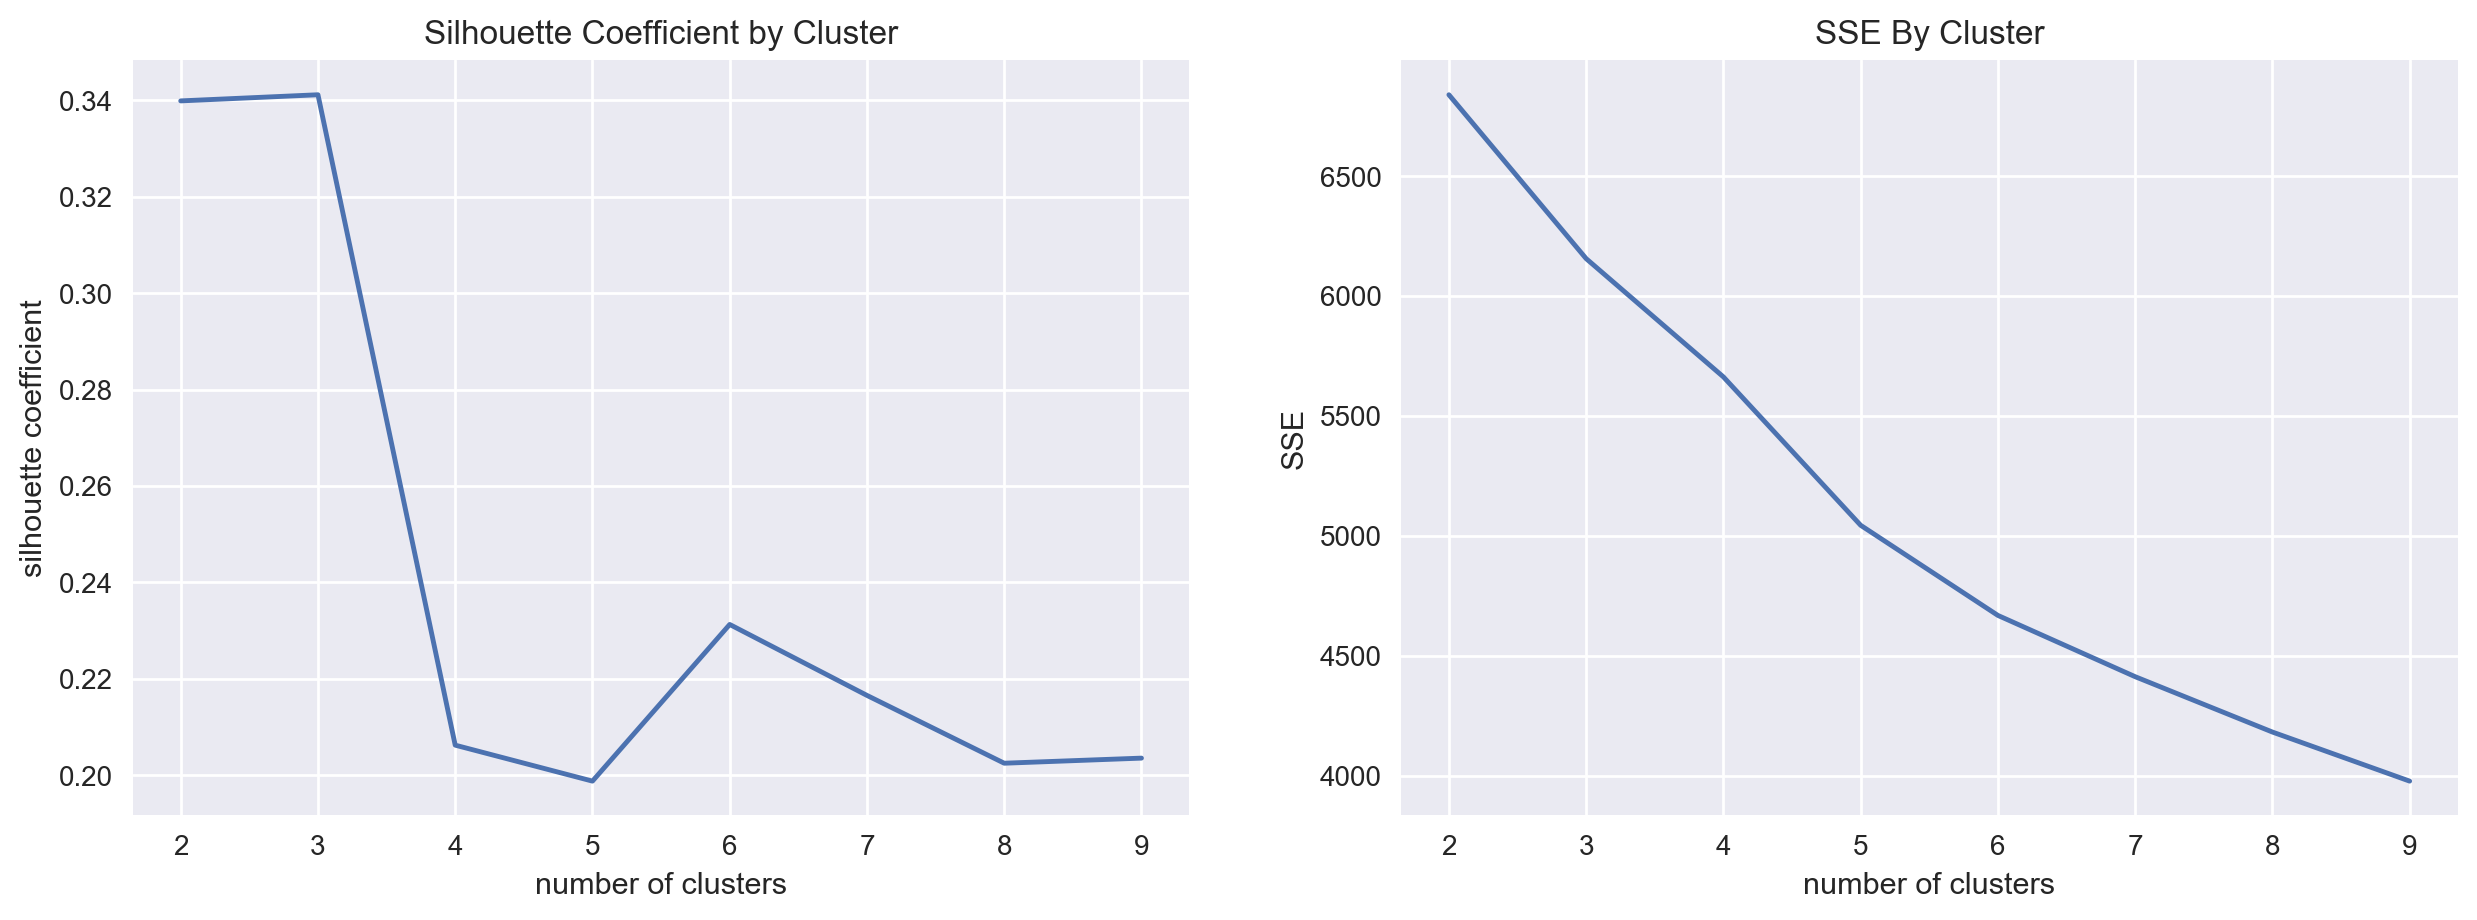

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')
ax1.set_title('Silhouette Coefficient by Cluster')
# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE')
ax2.set_title('SSE By Cluster')

## Plot Inertia

Text(0.5,1,'Inertia by Cluster')

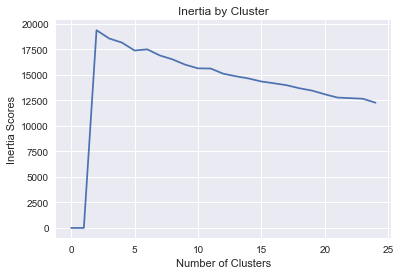

In [24]:
plt.plot(inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Scores')
plt.title("Inertia by Cluster")
# plt.xlim((2,25))
# plt.ylim((50000,400000))